# Title

**Exercise: 2 - Prediction CI**

# Description

You are the manager of the Advertising division of your company, and your boss asks you the question, **"How much more sales will we have if we invest $1000 dollars in TV advertising?"**

<img src="img/prediction_ci.jpeg" style="width: 500px;">

The goal of this exercise is to estimate the **Sales** with a 95% confidence interval using the Advertising.csv dataset.

# Instructions:
- Read the file Advertising.csv as a dataframe.
- Fix a budget amount of 1000 dollars for TV advertising as variable called Budget
- Select the number of bootstraps.
- For each bootstrap:
    - Select a new dataframe with the predictor as TV and the response as Sales.
    - Fit a simple linear regression on the data.
    - Predict on the budget and compute the error estimate using the helper function `error_func()`
    - Store the `sales` as a sum of the prediction and the error estimate and append to `sales_dist`
- Sort the `sales_dist which is a distribution of predicted sales over `numboot` bootstraps.
- Compute the 95% confidence interval of sales_dist
- Use the helper function `plot_simulation` to visualize the distribution and print the estimated sales.

# Hints

<a href="https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randint.html" target="_blank">np.random.randint()</a> : Returns list of integers as per mentioned size 

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html" target="_blank">df.sample()</a> : Get a new sample from a dataframe

<a href="https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.hist.html" target="_blank">plt.hist()</a> : Plots a histogram

<a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axvline.html" target="_blank">plt.axvline()</a> : Adds a vertical line across the axes

<a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axhline.html" target="_blank">plt.axhline()</a> : Add a horizontal line across the axes

<a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html" target="_blank">plt.legend()</a> : Place a legend on the axes

<a href="https://numpy.org/doc/stable/reference/generated/numpy.ndarray.sort.html#numpy.ndarray.sort" target="_blank">ndarray.sort()</a> : Returns the sorted ndarray.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.percentile.html" target="_blank">np.percentile(list, q)</a> : Returns the q-th percentile value based on the provided ascending list of values.

Note: This exercise is **auto-graded and you can try multiple attempts.**

In [1]:
# Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats

/var/folders/r9/ggpr596s74x4hr8c_sfdzc580000gn/T/ipykernel_40140/3738652419.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [12]:
# Read the `Advertising.csv` dataframe

df = pd.read_csv('data/advertising.csv')
df = df.drop(['Unnamed: 0'], axis=1)

In [13]:
# Take a quick look at the data

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [14]:
# This helper function computes the variance of the error term

def error_func(y,y_p):
    n = len(y)
    return np.sqrt(np.sum((y-y_p)**2/(n-2)))

In [24]:
# select the number of bootstraps 

numboot = 1000

# Select the budget. We have used a 2d list to facilitate model prediction (sklearn.LinearRegression requires input as a 2d array)
budget = [[1000]]

# Define an empty list that will store sales predictions for each bootstrap
sales_list = []

In [25]:
# Running through each bootstrap, we fit a model, make predictions and compute sales which is appended to the list defined above

# Loop through each bootstrap
for i in range(numboot):

    # Create bootstrapped version of the data using the sample function
    # Set frac=1 and replace=True to get a bootstrap
    df_new = df.sample(frac=1, replace=True)

    # Get the predictor data ('TV') from the new bootstrapped data
    x = df_new[['TV']]

    # Get the response data ('Sales') from the new bootstrapped data
    y = df_new[['Sales']]

    # Initialize a Linear Regression model
    linreg = LinearRegression()

    # Fit the model on the new data
    linreg.fit(x,y)

    # Predict on the budget from the original data
    prediction = linreg.predict(budget)

    # Predict on the bootstrapped data
    y_pred = linreg.predict(x)

    # Compute the error using the helper function error_func
    error = np.random.normal(0,error_func(y,y_pred))

    # The final sales prediction is the sum of the model prediction
    # and the error term
    sales = prediction + error

    # Convert the sales to float type and append to the list
    sales_list.append(np.float64(sales))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a

In [26]:
### edTest(test_sales) ###
# We sort the list containing sales predictions in ascending values 

sales_list.sort()

# find the 95% confidence interval using np.percentile function at 2.5% and 97.5%

sales_CI = (np.percentile(sales_list,2.5),np.percentile(sales_list, 97.5))

In [27]:
# Use this helper function to plot the histogram of beta values along with the 95% confidence interval

def plot_simulation(simulation,confidence):
    plt.hist(simulation, bins = 30, label = 'beta distribution', align = 'left', density = True,edgecolor='k')
    plt.axvline(confidence[1], 0, 1, color = 'r', label = 'Right Interval')
    plt.axvline(confidence[0], 0, 1, color = 'red', label = 'Left Interval')
    plt.xlabel('Beta value')
    plt.ylabel('Frequency')
    plt.legend(frameon = False, loc = 'upper right')

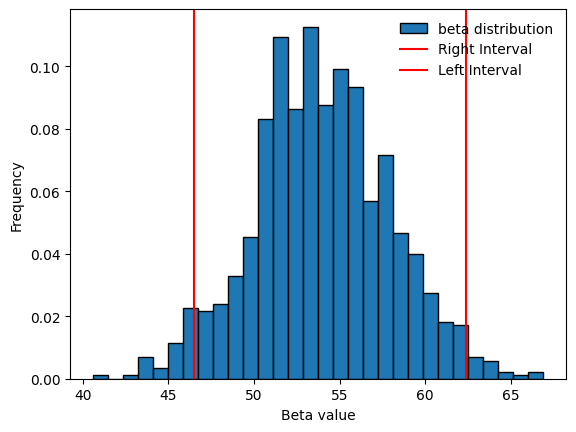

In [28]:
# call the function above with the computed sales distribution and the confidence intervals from earlier

plot_simulation(sales_list,sales_CI)

In [29]:
# Print the computed values

print(f"With a TV advertising budget of ${budget[0][0]},")
print(f"we can expect an increase of sales anywhere between {sales_CI[0]:0.2f} to {sales_CI[1]:.2f}\
 with a 95% confidence interval")

With a TV advertising budget of $1000,
we can expect an increase of sales anywhere between 46.49 to 62.40 with a 95% confidence interval


## Post-exercise question

Your sales prediction is based on the Simple-Linear regression model between `TV` and `Sales`.
Now, re-run the above exercise but this time fit the model considering all variables in `Advertising.csv`.

Keep the budget the same, i.e $1000 for 'TV' advertising. 
You may have to change the `budget` variable to something like `[[1000,0,0]]` for proper computation.

Does your predicted sales interval change?
Why, or why not?

In [149]:
# Your answer here